# <center style="color:#FF9009">McDonald's Case Study</center>

## <span style="color:#EBBC23">Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

## <span style="color:#EBBC23">Exploring Data</span>

In [2]:
# Loading data
data = pd.read_csv('mcdonalds.csv')
df = pd.read_csv('mcdonalds.csv')

In [3]:
# Data
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
# Features
print(f"Features - {list(df.columns)}")

Features - ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [5]:
# Dimension
print(f"Shape - {df.shape}")

Shape - (1453, 15)


In [6]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


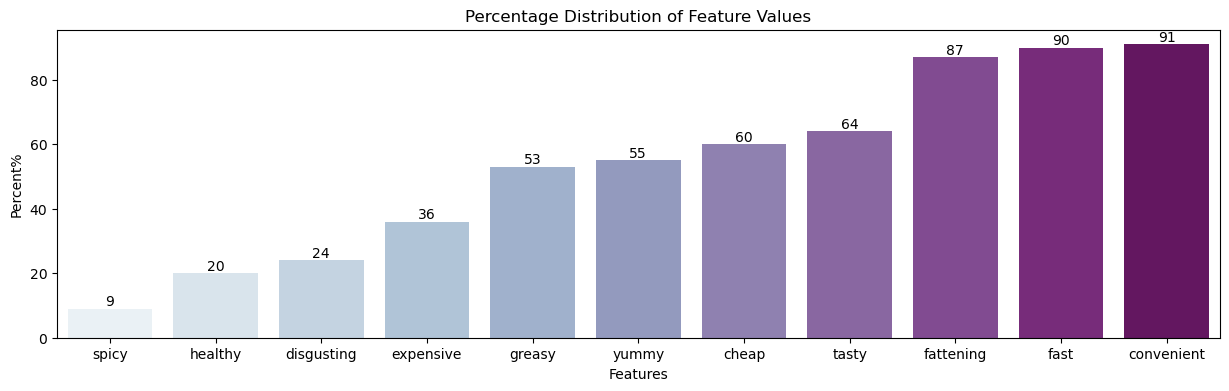

In [7]:
#Converting first 11 coulmn entries in a binary matrix of 1 and 0 and then calculating mean
temp_data = df.iloc[:,0:11].replace("Yes",1).replace("No",0)
temp = round(temp_data.mean()*100).reset_index()
temp.columns = ["Features", "Percent%"]
temp.sort_values(by='Percent%', inplace=True)

plt.figure(figsize=(15,4))
ax = sns.barplot(data=temp, x='Features', y='Percent%', palette='BuPu', )
ax.bar_label(ax.containers[0])
plt.title("Percentage Distribution of Feature Values")
plt.show()

People Find McDonald's food -
* 55% yummy, 
* 91% convenient and 
* 9% spicy

## <span style="color:#EBBC23">Exploratory Data Analysis</span>

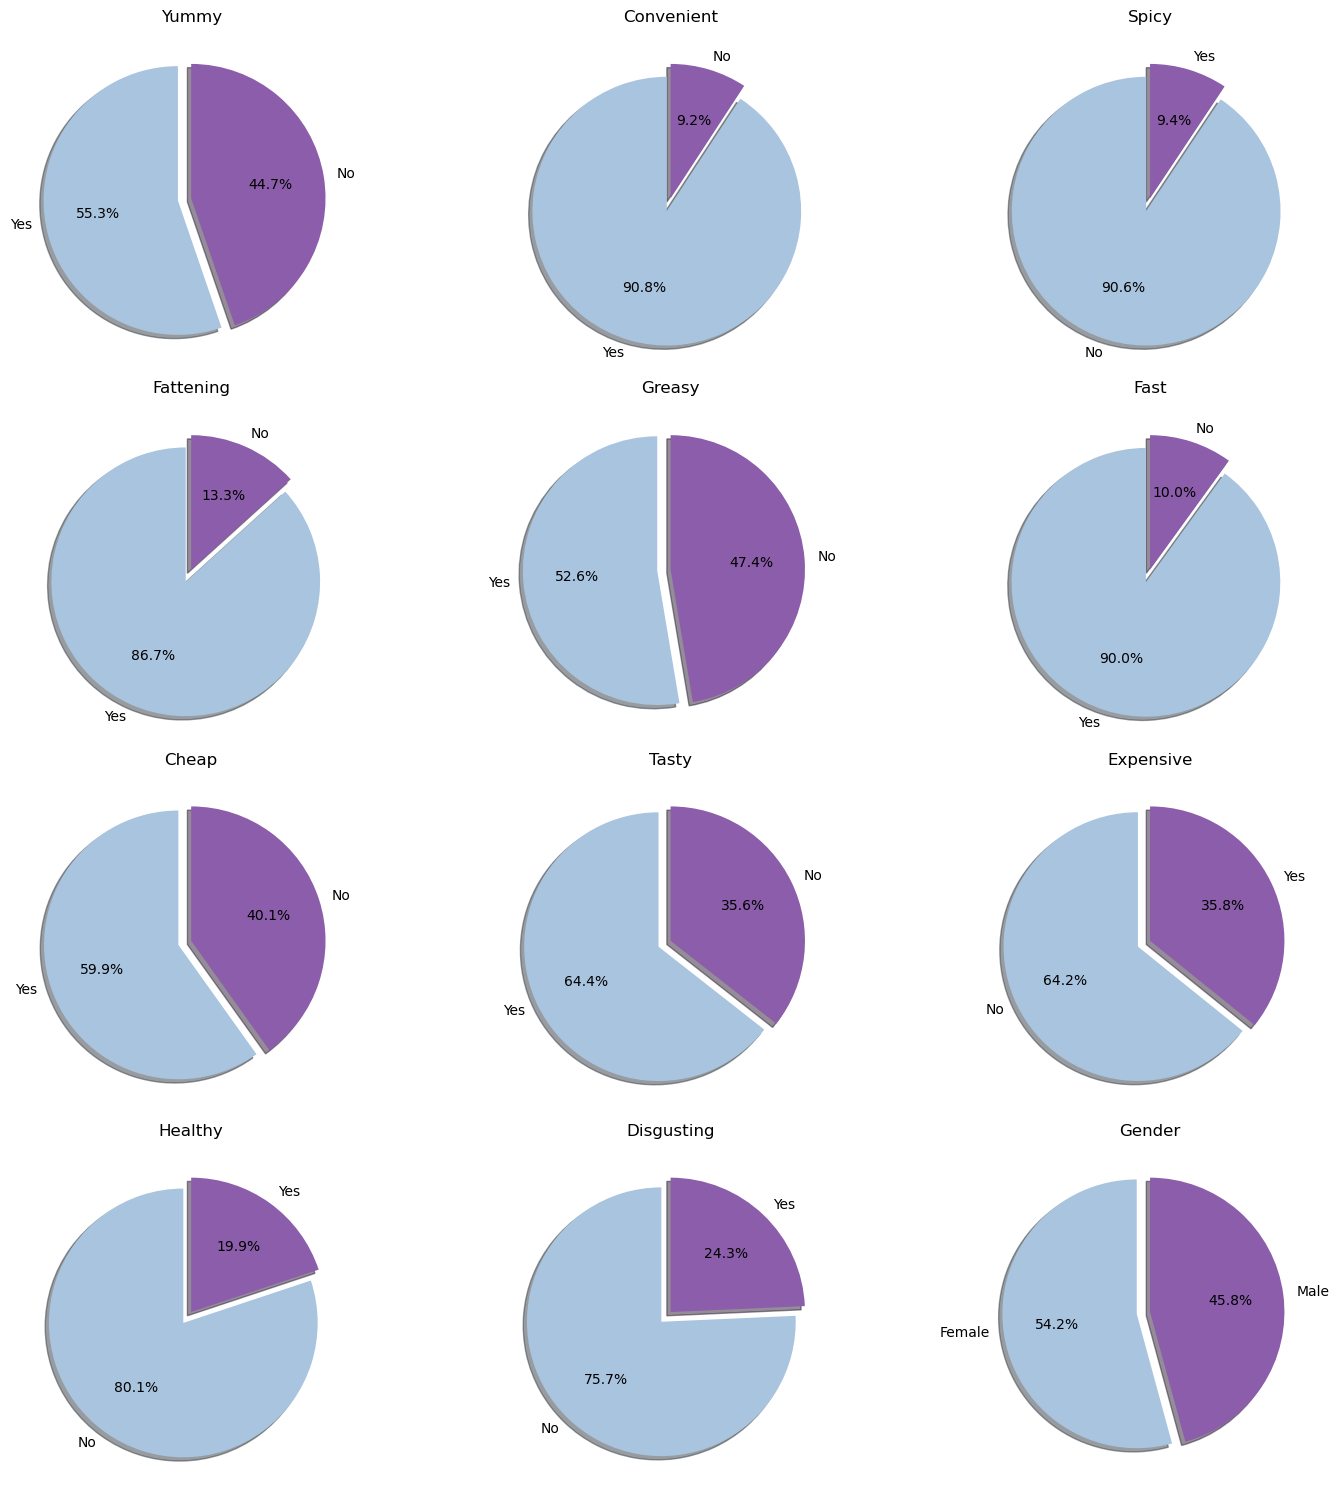

In [8]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
ax = ax.flatten()

for i, column in enumerate(features):
    counts = df[column].value_counts()
    ax[i].pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette('BuPu', len(counts)), 
        explode=(0.1, 0), 
        shadow=True, 
        startangle=90
    )
    ax[i].set_title(str.capitalize(column))

plt.tight_layout()
plt.show()

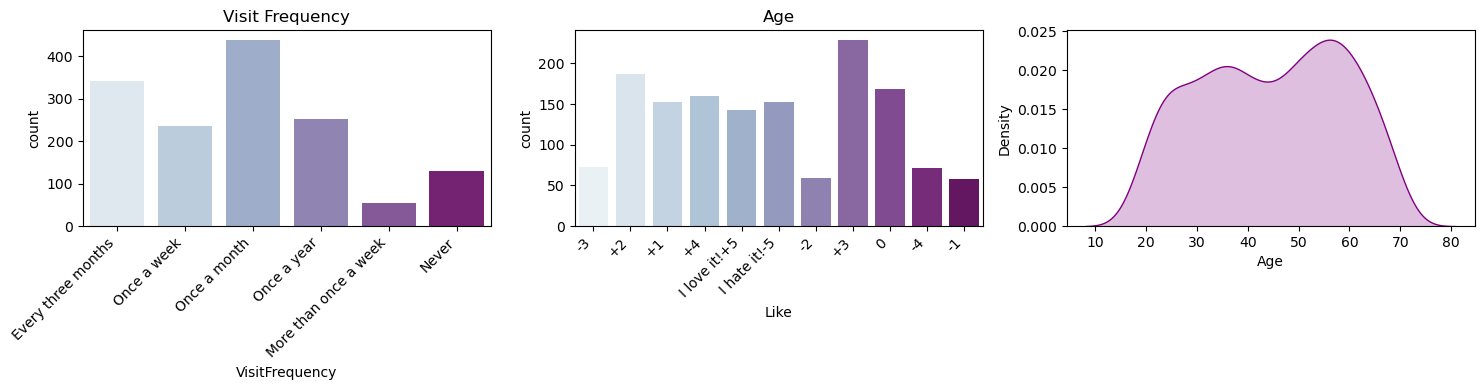

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

sns.countplot(data=df, x='VisitFrequency', palette='BuPu', ax=ax[0])
ax[0].set_title("Visit Frequency")
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=df, x='Like', palette='BuPu', ax=ax[1])
ax[1].set_title("Like")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')

sns.kdeplot(data=df, x='Age', color='purple', ax=ax[2], fill=True)
ax[1].set_title("Age")

plt.tight_layout()
plt.show()

## <span style="color:#EBBC23">Data Cleaning & Preprocessing</span>

In [10]:
# Checking Null Data
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [11]:
# Checking Duplicate Data
df.duplicated().sum()

22

In [12]:
# Dropping duplicate data
df.drop_duplicates(inplace=True)
data.drop_duplicates(inplace=True)

In [13]:
# Dropping features - Like, Age, VisitFrequency & Gender
df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1, inplace=True) 

In [14]:
# Encoding Binary Features - Yes->1, No->0
for feature in df.columns:
    df[feature] = df[feature].map({"Yes":1, "No":0})

In [15]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0


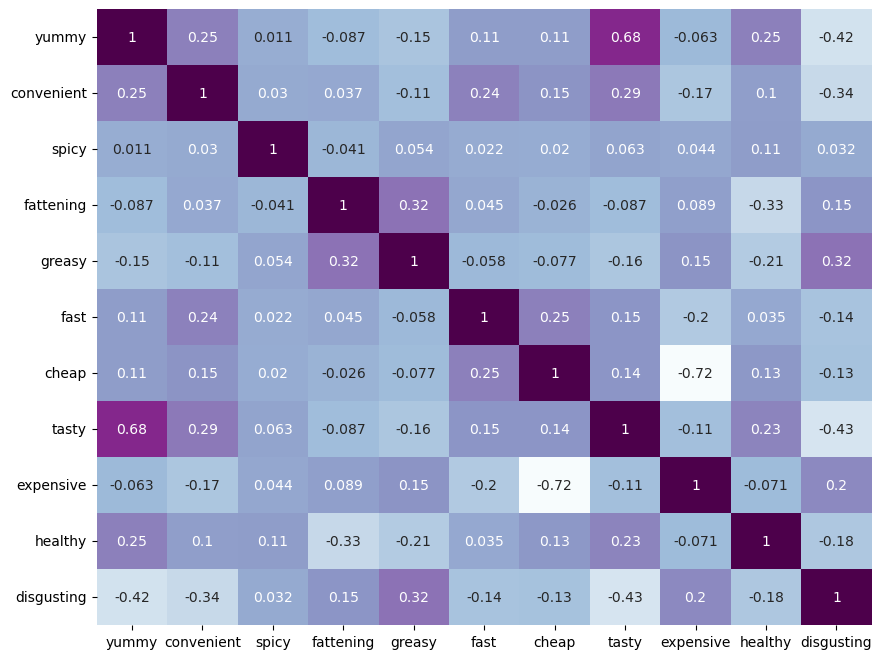

In [16]:
# Correlation Between Features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='BuPu', cbar=False)
plt.show()

## <span style="color:#EBBC23">Principle Component Analysis (PCA) Implementation </span>

In [17]:
pca = PCA()
pc = pca.fit_transform(df)

In [18]:
# Calculate the proportion of variance, standard deviation and cummulative variance explained by each principal component
standard_deviation = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_
cummulative_variance = proportion_variance.cumsum()

summary = pd.DataFrame(
    {"Standard deviation": standard_deviation,
    "Proportion of Variance": proportion_variance,
    "Cumulative Proportion": cummulative_variance}, 
    index=[f"PC{i}" for i in range(1, 12)]
    )

summary

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757976,0.298991,0.298991
PC2,0.606714,0.191564,0.490554
PC3,0.504928,0.132680,0.623234
PC4,0.399128,0.082903,0.706137
PC5,0.338692,0.059698,0.765835
PC6,0.312106,0.050693,0.816528
PC7,0.291761,0.044300,0.860828
PC8,0.276721,0.039850,0.900678
PC9,0.267201,0.037155,0.937834
PC10,0.250292,0.032602,0.970435


Conclusion - **Results from principal components analysis indicate that the first two components
capture about 50% (49.05%) of the information contained in the segmentation variables**

In [19]:
temp_df = pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1,12)])
temp_df['feature'] = df.columns.values
temp_df = temp_df.set_index('feature')
temp_df = round(-temp_df, 4)

temp_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,0.4737,-0.3706,0.3014,-0.0538,0.3078,-0.1703,0.2785,-0.0126,-0.5742,0.1076,-0.0426
convenient,0.1553,-0.0168,0.0629,0.1445,-0.2768,0.3437,0.0601,0.1083,0.0155,0.6525,0.5610
spicy,0.0074,-0.0191,0.0395,-0.1993,-0.0740,0.3533,-0.7070,-0.3815,-0.3958,0.0792,-0.1404
fattening,-0.1161,0.0344,0.3223,0.3491,0.0699,0.4034,0.3920,-0.5908,0.1603,0.0119,-0.2518
greasy,-0.3037,0.0576,0.8030,-0.2450,-0.3627,-0.2153,-0.0390,0.1416,0.0026,-0.0083,-0.0017
fast,0.1094,0.0869,0.0659,0.0976,-0.1128,0.5987,0.0852,0.6250,-0.1681,-0.2281,-0.3424
cheap,0.3411,0.6069,0.1559,-0.1232,0.1272,0.1012,0.0409,-0.1405,-0.0740,-0.4415,0.4771
tasty,0.4693,-0.3120,0.2857,0.0070,0.2119,0.0792,-0.3574,0.0734,0.6404,-0.0760,-0.0223
expensive,-0.3332,-0.5985,-0.0282,-0.0688,0.0004,0.2629,0.0675,-0.0316,-0.0642,-0.4669,0.4779


Conclusion - **The two segmentation variables with the highest loadings (in absolute
terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this
principal component captures the price dimension.**

## <span style="color:#EBBC23">Plotting PC1 & PC2</span>

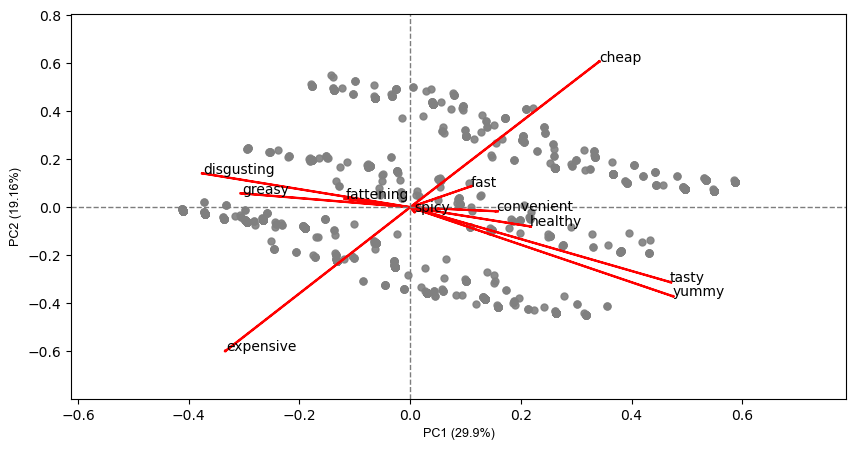

In [20]:
loadings = -(pca.components_)

cluster.biplot(cscore=pc, loadings=loadings, labels=df.columns, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),
               show=True, dim=(10, 5),
               markerdot='o', dotsize=25, valphadot=0.9, colordot='Grey', 
               arrowcolor='red', valphaarrow=1, arrowlinestyle='-', arrowlinewidth=1.5)
     

## <span style="color:#EBBC23">Elbow Method For Optiml Value of K</span>

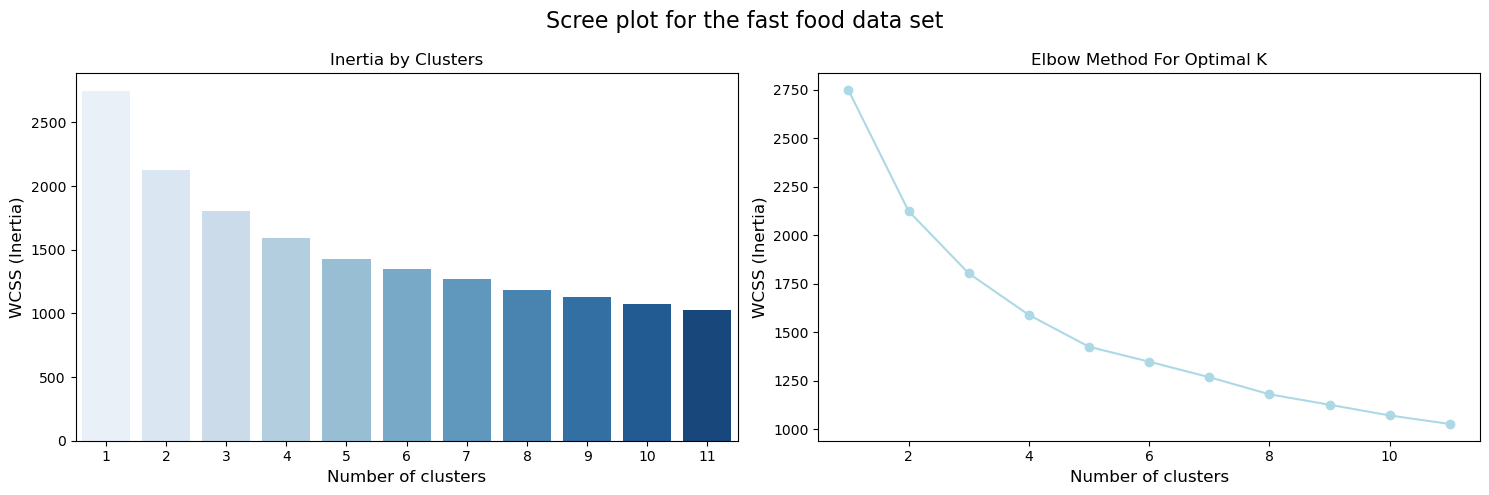

In [21]:
# Scree plot for fast food dataset
wcss = []
K = range(1,12)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

wcss_df = pd.DataFrame({"Clusters":K, "Inertia":wcss})

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  

sns.barplot(ax=axs[0], data=wcss_df, x='Clusters', y='Inertia', palette='Blues')
axs[0].set_xlabel('Number of clusters', fontsize=12)
axs[0].set_ylabel('WCSS (Inertia)', fontsize=12)
axs[0].set_title('Inertia by Clusters', fontsize=12)

axs[1].plot(K, wcss, marker='o', color='lightblue')
axs[1].set_xlabel('Number of clusters', fontsize=12)
axs[1].set_ylabel('WCSS (Inertia)', fontsize=12)
axs[1].set_title('Elbow Method For Optimal K', fontsize=12)

plt.suptitle('Scree plot for the fast food data set', fontsize=16)
plt.tight_layout()
plt.show()

* Scree plots are unreliable for market segmentation, because it does not have a distinct elbow. This means that the sum of distances within market segments drops slowly with increase in market segments.

* Stability analysis is a better approach to determine optimal market segments.

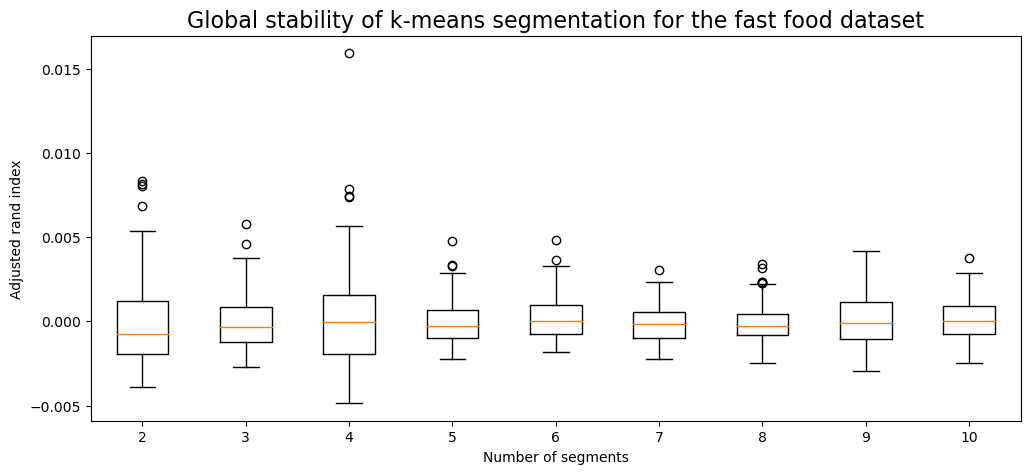

In [22]:
# Global stability results
cluster_result = []
K = range(2,11)
for i in K:
  kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
  kmeans.fit(df)
  cluster_result.append(kmeans.labels_)

n_bootstraps=100 
ARI_scores=[]
for labels in cluster_result:
  ari_boot=[]
  for _ in range(n_bootstraps):
    random_sample=np.random.choice(labels, size=len(labels), replace=True)
    ari = adjusted_rand_score(labels, random_sample)
    ari_boot.append(ari)
  ARI_scores.append(ari_boot)

plt.figure(figsize=(12, 5))
plt.boxplot(ARI_scores, labels=K)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted rand index')
plt.title('Global stability of k-means segmentation for the fast food dataset', size=16)
plt.show()

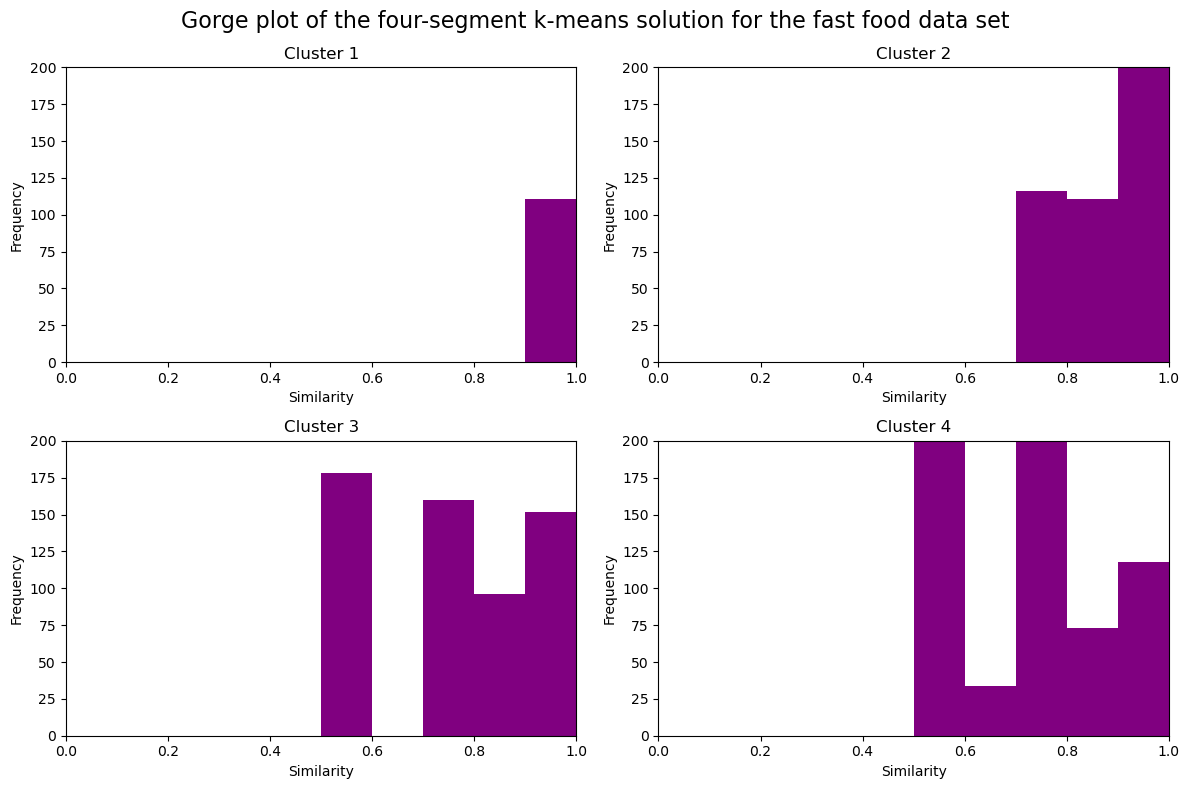

In [23]:
kmeans_data = {}
K = range(1,12)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    kmeans_data[str(i)] = kmeans

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):
    similarities = kmeans_data[str(i)].transform(df).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=10, range=(0,1), color='purple')
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i), size=12)
    axs[row, col].set_xlim(0, 1)
    axs[row, col].set_ylim(0, 200)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])


fig.suptitle("Gorge plot of the four-segment k-means solution for the fast food data set", size=16)
plt.tight_layout()
plt.show()

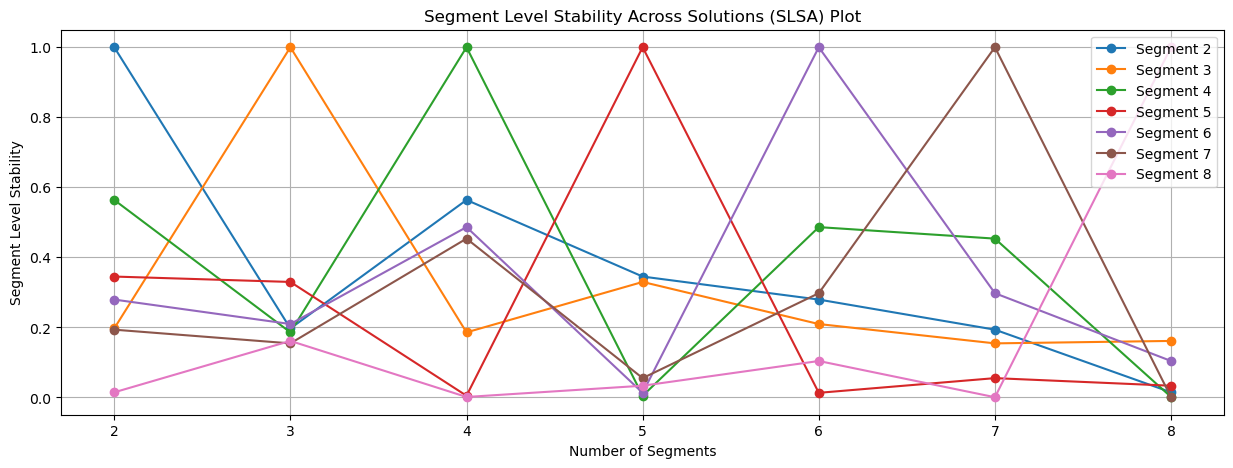

In [24]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = kmeans_data[str(segment)].predict(df)
    segment_stability.append(labels_segment)

plt.figure(figsize=(15, 5))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')


plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()

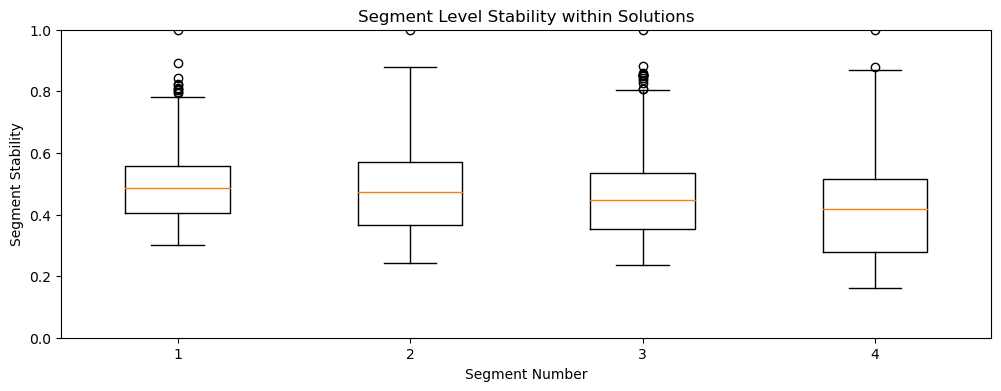

In [25]:
segment_labels = {}
segment_similarities = {}

for i in range(2,6):
    segment_labels[str(i)] = kmeans_data[str(i)].predict(df)
    segment_similarities[str(i)] = kmeans_data[str(i)].transform(df).min(axis=1)

segment_stability_values = []
for i in range(2,6):
    similarities = segment_similarities[str(i)]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)


plt.figure(figsize=(12,4))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, 5))
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()

In [26]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
kmeans_new_data = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234, n_init='auto')
    model.fit(df.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = df.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    kmeans_new_data.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
kmeans_new_data = pd.DataFrame(kmeans_new_data, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(kmeans_new_data)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     7       True  2   2 -2124.795438  4253.590876  4264.123134  4263.456328
1     7       True  3   3 -1917.442295  3840.884589  3856.682976  3855.623077
2     9       True  4   4 -1639.384387  3286.768775  3307.833290  3306.482332
3     6       True  5   5 -1460.841715  2931.683430  2958.014074  2956.466167
4     9       True  6   6 -1324.832078  2661.664156  2693.260928  2691.495671
5     6       True  7   7 -1280.358467  2574.716935  2611.579836  2609.720408
6     6       True  8   8 -1205.606583  2427.213167  2469.342197  2467.317232


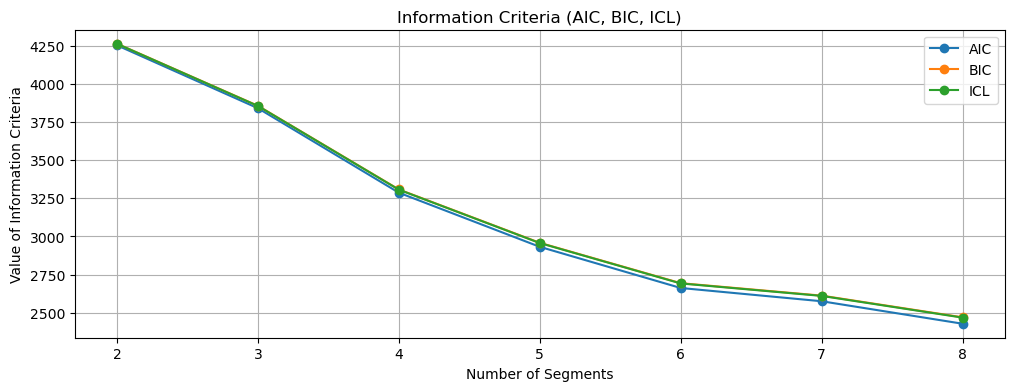

In [27]:
num_segments = kmeans_new_data["k"]
AIC_values = kmeans_new_data["AIC"]
BIC_values = kmeans_new_data["BIC"]
ICL_values = kmeans_new_data["ICL"]

plt.figure(figsize=(12,4))
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Contingency Table

k = 4
kmeans = KMeans(n_clusters=k, random_state=1234, n_init='auto')
kmeans.fit(df)
kmeans_clusters = kmeans.predict(df)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(df)
gmm_clusters = gmm.predict(df)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

print("Contingency Table:")
contingency_table = pd.crosstab(results['kmeans'], results['mixture'])
contingency_table

Contingency Table:


mixture,0,1,2,3
kmeans,,,,
0,284,4,18,206
1,7,248,32,34
2,15,4,228,0
3,17,11,0,323


In [29]:
gm = GaussianMixture(n_components=4)
gm.fit(df)
log_likelihood_m4a = gm.score(df)

gm = GaussianMixture(n_components=4)
gm.fit(df)
log_likelihood_m4 = gm.score(df)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 10.447412725165467
Log-likelihood for MD.m4: 11.662161975577444


In [30]:
data['Like'].value_counts().reset_index().sort_values(by='count', ascending=False)

,Like,count
0,+3,225
1,+2,180
2,0,168
3,+4,156
4,+1,152
5,I hate it!-5,150
6,I love it!+5,140
7,-3,73
8,-4,70
9,-2,59


In [31]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

data['Like'] = data['Like'].map(like_mapping)
data['Like'].value_counts()

Like
 3.0    225
 2.0    180
 0.0    168
 4.0    156
-5.0    150
 5.0    140
-3.0     73
-4.0     70
-2.0     59
-1.0     58
Name: count, dtype: int64

In [32]:
from patsy import dmatrices, dmatrix

independent_vars = data.columns[0:11] 
formula_str = 'Like ~ ' + ' + '.join(independent_vars)
f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [33]:
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
reg_model = model.fit(X, y)

print(reg_model)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 966
2: 465


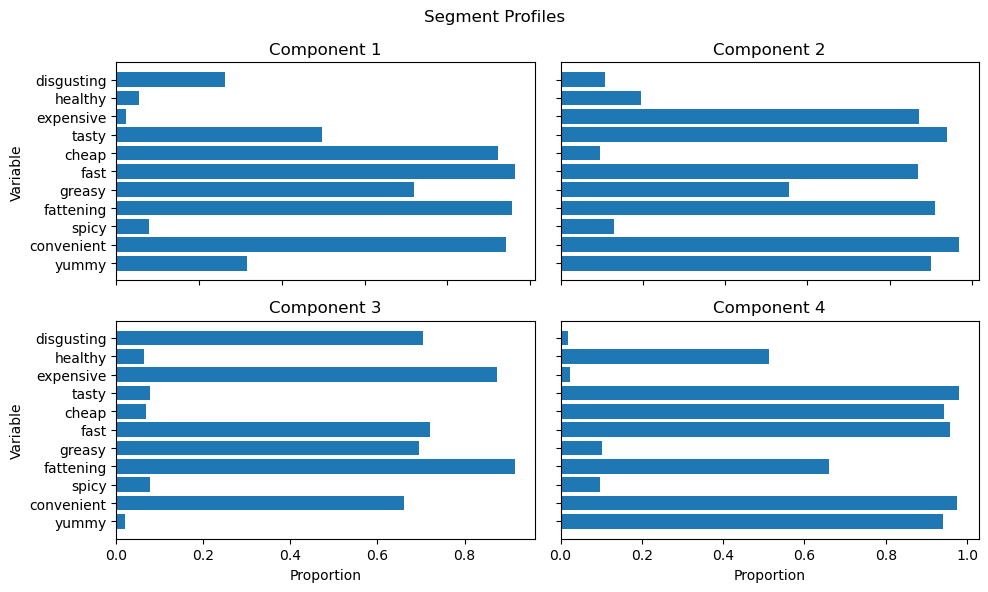

In [34]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=1234)
kmeans.fit(df)

labels = kmeans.labels_

df_mean = df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(df_mean.shape[1]), df_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(df_mean.shape[1]), df_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(df_mean.shape[1]), df_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(df_mean.shape[1]), df_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(df_mean.shape[1]))
    ax.set_yticklabels(df.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

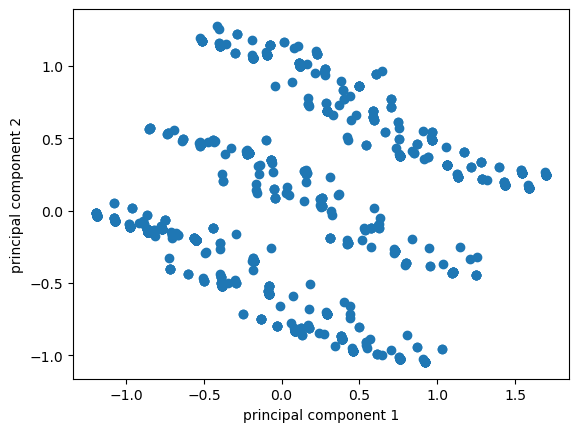

In [35]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(df)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

fig, ax = plt.subplots()

ax.scatter(df_pca[:, 0], df_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

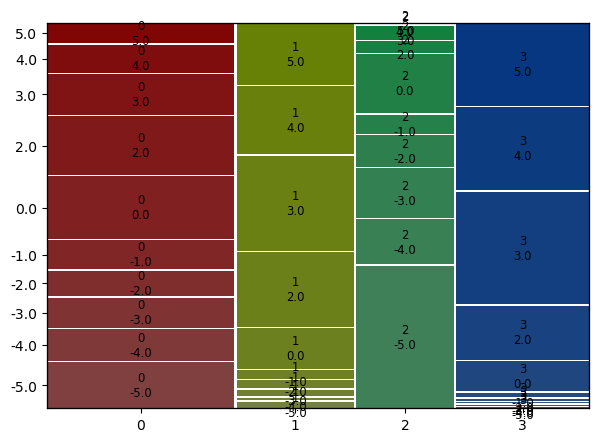

In [36]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df_eleven = data.loc[:,cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1234, n_init='auto').fit(df_eleven)
data['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
crosstab = crosstab[[-5,-4,-3,-2,-1,0,2,3,4,5]]
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()


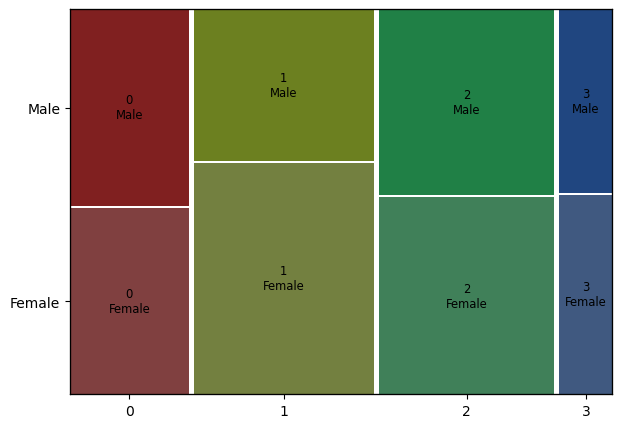

In [37]:
from statsmodels.graphics.mosaicplot import mosaic

kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(df)

ct = pd.crosstab(kmeans.labels_, data['Gender'])
mosaic(ct.stack(),gap=0.01)

plt.show()

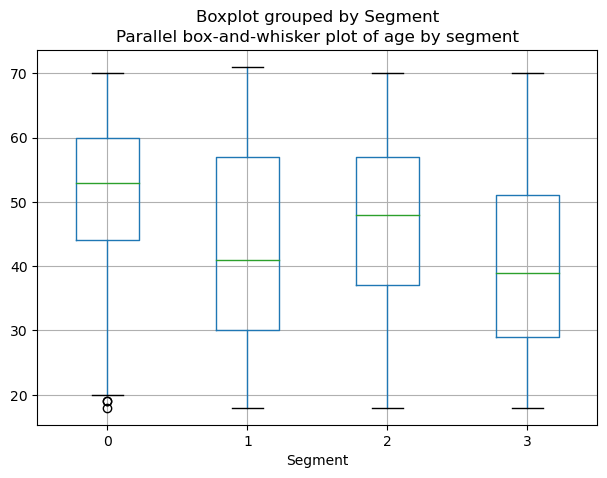

In [38]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(df)
df = pd.DataFrame({'Segment': kmeans.labels_, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.show()

In [39]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.701172
1,1,2.548287
2,2,2.708502
3,3,2.586895


In [40]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.089844
1,1,7.112150
2,2,2.542510
3,3,7.495726


In [41]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.425781
1,1,0.520249
2,2,0.566802
3,3,0.381766


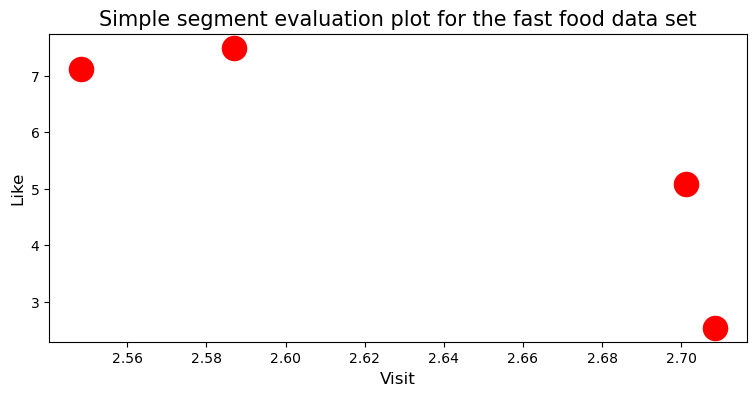

In [42]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

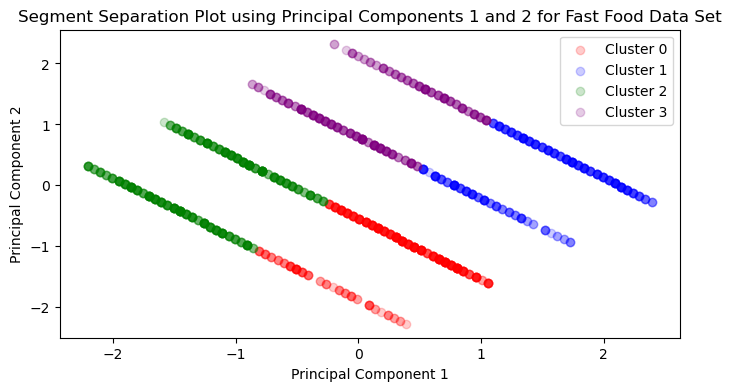

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=1234, n_init='auto')
kmeans.fit(pca_components)
kmeans_labels = kmeans.labels_

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(8, 4))

colors = ['red', 'blue', 'green', 'purple']
for cluster in range(k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot using Principal Components 1 and 2 for Fast Food Data Set')
plt.legend()
plt.show()
